In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

from matplotlib import rcParams
from matplotlib import rc

In [3]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## plot function

In [4]:
# Density scatter fun
def density_scatter( x , y, title = None, xlabel = None, ylabel = None, ax = None, sort = True, bins = 20, **kwargs):
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z,s=10)

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
#     cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
#     cbar.ax.set_ylabel('Density')
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

    return ax

## Data selection

In [5]:
# Range of era5 timesdates to be used
range_ = 692504,1043135

# Loading data into memmory
Hs_ww = pd.read_csv('ERA5/Hs_ww.csv',header=None,index_col=0,).loc[range_[0]:range_[1]]
Tww_m = pd.read_csv('ERA5/T_ww_m.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
dww_m = pd.read_csv('ERA5/dww_m_nan.csv',header=None,index_col=0).loc[range_[0]:range_[1]]

Hs_s_m = pd.read_csv('ERA5/Hs_s_m.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
T_s_m = pd.read_csv('ERA5/T_s_m.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
dm_s = pd.read_csv('ERA5/dm_s.csv',header=None,index_col=0).loc[range_[0]:range_[1]]

u10 = pd.read_csv('ERA5/u10.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
v10 = pd.read_csv('ERA5/v10.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
mod10 = pd.read_csv('ERA5/mod10.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
mod10_angle = pd.read_csv('ERA5/mod10_angle.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
P = pd.read_csv('ERA5/P.csv',header=None,index_col=0).loc[range_[0]:range_[1]]
surge = pd.read_csv('ERA5/surge.csv',header=None,index_col=0).loc[range_[0]:range_[1]]

In [9]:
not_nan = np.invert(np.isnan(dww_m.iloc[:,1]))
# Plot data
vars_ = 'Significant wave height','Wave period','Wind speed', 'Wind angle', 'Precipitation', 'Wind wave direction', 'Storm surge'
data = Hs_ww[not_nan], Tww_m[not_nan], mod10[not_nan], mod10_angle[not_nan], P[not_nan], dww_m[not_nan], surge[not_nan]


# vars_ = 'Significant wave height swel','Swel wave period','Swel wave direction','Wind speed', 'Wind angle', 'Precipitation'
# data = Hs_s_m[not_nan], T_s_m[not_nan], dww_m[not_nan], mod10[not_nan], mod10_angle[not_nan], P[not_nan]

# vars_ = 'Hs wind waves', 'Wind wave direction','Hs swell','Swell direction'
# data = Hs_ww[not_nan], dww_m[not_nan], Hs_s_m[not_nan], dm_s[not_nan]

# vars_ = 'Hs_s_m','T_s_m','dww_m','mod10', 'mod10_angle', 'P'
# data = Hs_s_m, T_s_m, dww_m, mod10, mod10_angle, P


# vars_ = 'Hs_ww','Tww_m','dww_m', 'P'
# data = Hs_ww, Tww_m, dww_m, P

# vars_ = 'Hs_ww','Tww_m','Hs_s_m','T_s_m'
# data = Hs_ww, Tww_m, Hs_s_m, T_s_m

## Plot loop

In [10]:
fig, axs = plt.subplots(len(vars_), len(vars_),figsize=[20,20])
for i in range(len(vars_)):
    for j in range(len(vars_)):
        axs[0,j].title.set_text(vars_[j])
        axs[j,0].set_ylabel(vars_[j])
        if (i==j):
            axs[i, j].hist(np.array(data[j].iloc[:,1]),bins=20,density=True)
        else:
            density_scatter(np.array(data[j].iloc[:,1]), np.array(data[i].iloc[:,1]),ax=axs[i,j])
#             axs[i, j].plot(np.array(data[j].iloc[:,1]), np.array(data[i].iloc[:,1]),'.')
fig.suptitle("Correlation matrix", fontsize=32)
plt.savefig('Images/Correlation_matrix_wind.png')
plt.close()

Text(0, 0.5, 'Probability/cell width')

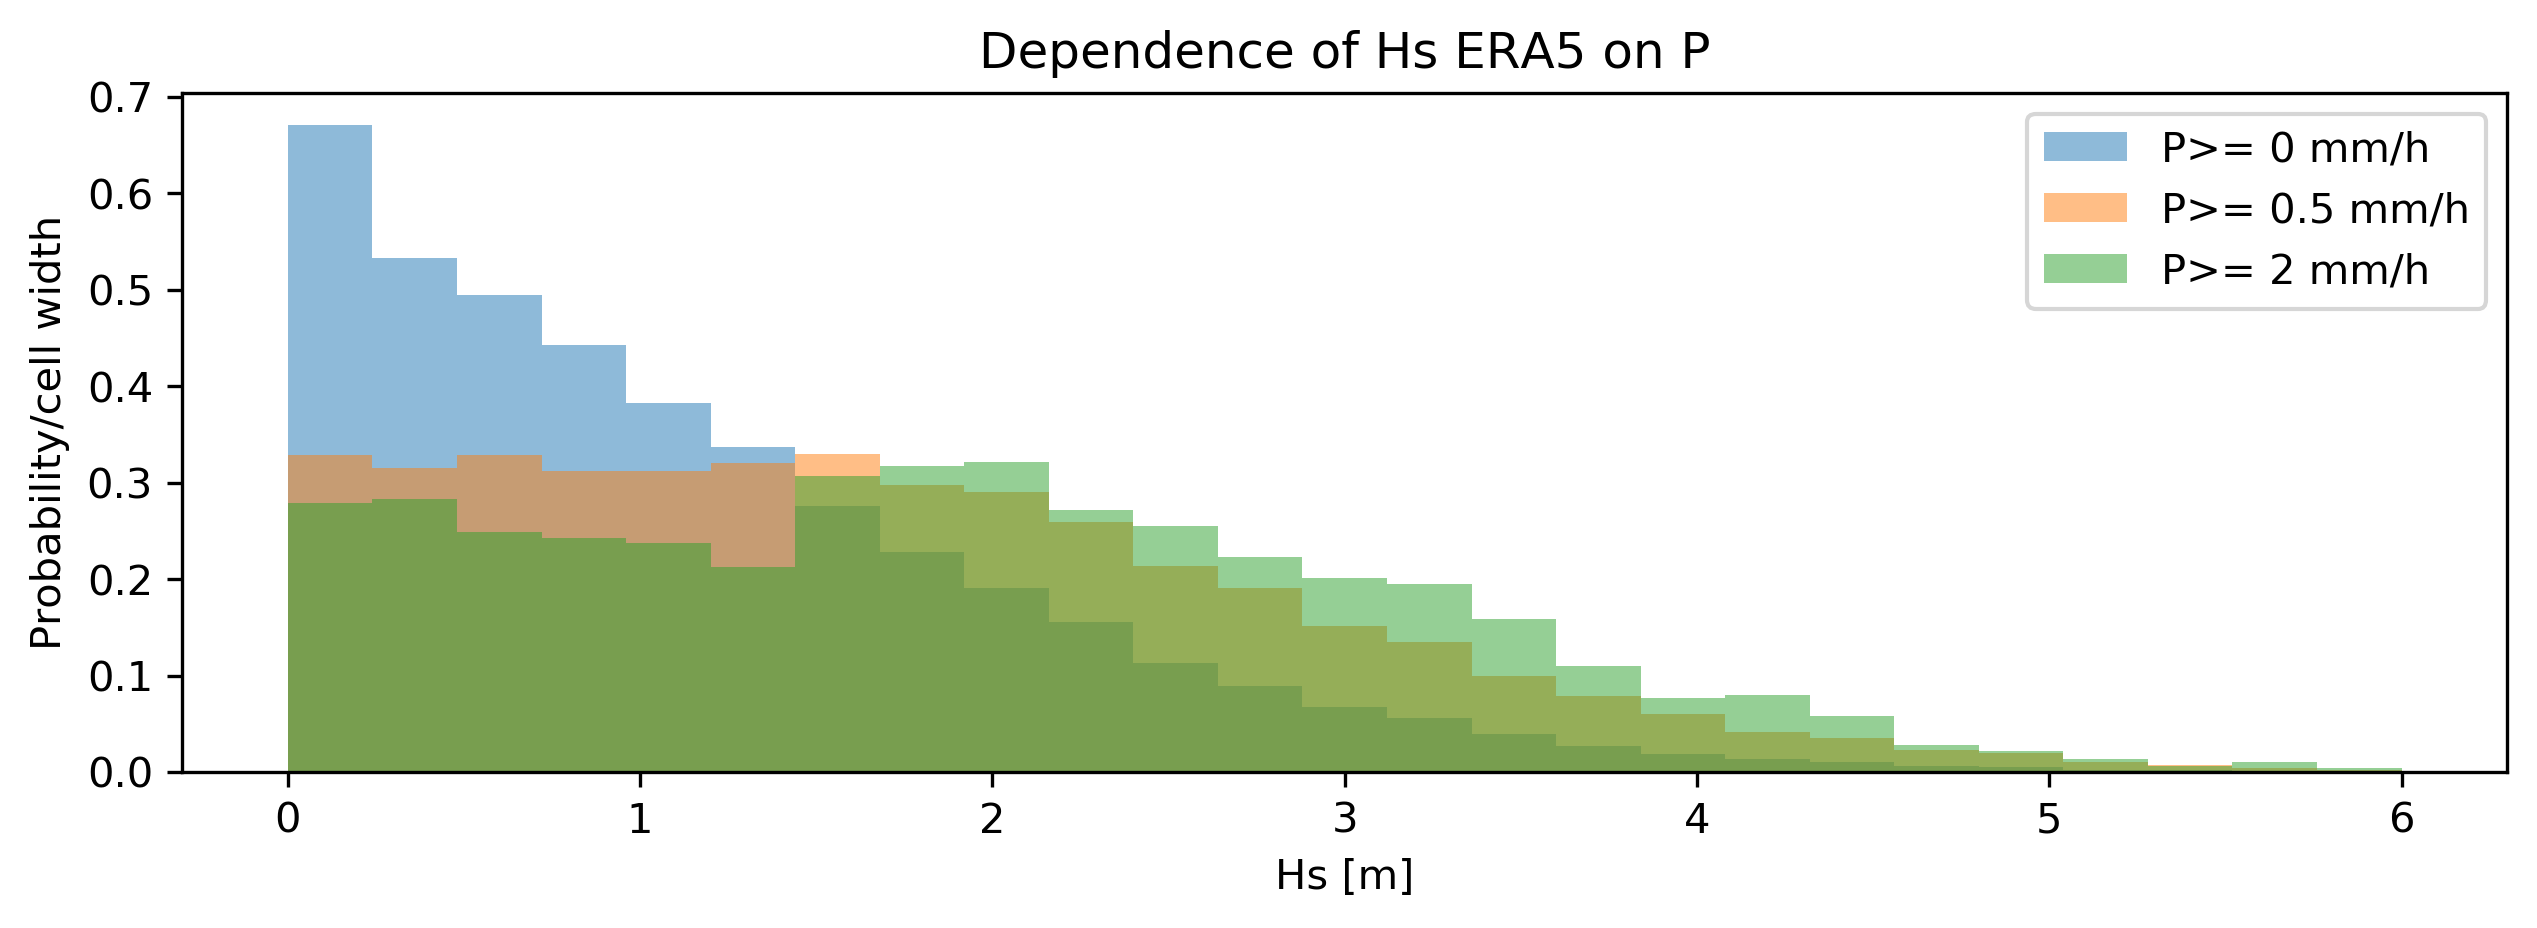

In [29]:
plt.figure(figsize=[10,3])
plt.title('Dependence of Hs ERA5 on P')
plt.hist(Hs_ww[P.iloc[:,1]>0].iloc[:,1],25, density=True,alpha=0.5, range=[0,6],label='P>= 0 mm/h')
plt.hist(Hs_ww[P.iloc[:,1]>.5].iloc[:,1],25, density=True,alpha=0.5, range=[0,6],label='P>= 0.5 mm/h')
plt.hist(Hs_ww[P.iloc[:,1]>2].iloc[:,1],25, density=True,alpha=0.5, range=[0,6],label='P>= 2 mm/h')
plt.legend()
plt.xlabel('Hs [m]')
plt.ylabel('Probability/cell width')
# plt.savefig('Images/Hist_P_HsWwERA5.png')
# plt.close()

0
692508.0     1.736936
692509.0     1.675866
692510.0     1.632811
692511.0     1.576726
692512.0     1.513050
692516.0     0.839009
692517.0     0.655798
692518.0     0.639596
692519.0     0.677326
692520.0     0.714036
692521.0     0.816349
692522.0     0.984491
692523.0     1.218348
692524.0     1.409491
692525.0     1.508971
692526.0     1.612303
692527.0     1.738183
692540.0     1.312050
692554.0     0.726273
692555.0     1.019275
692556.0     1.253812
692557.0     1.396121
692558.0     1.473054
692648.0     1.312730
692649.0     1.362243
692650.0     1.577972
692651.0     1.653885
692652.0     1.681191
692653.0     1.638476
692654.0     1.529818
               ...   
1043106.0    0.445947
1043107.0    0.396034
1043108.0    0.344871
1043109.0    0.301690
1043110.0    0.269665
1043111.0    0.298035
1043112.0    0.301882
1043113.0    0.324386
1043114.0    0.365259
1043115.0    0.390937
1043116.0    0.402381
1043117.0    0.411133
1043118.0    0.423827
1043119.0    0.386994
1043120.

0
692504.0     1.932271
692505.0     1.928985
692506.0     1.900999
692507.0     1.824860
692508.0     1.736936
692509.0     1.675866
692510.0     1.632811
692511.0     1.576726
692512.0     1.513050
692513.0     1.426939
692514.0     1.263330
692515.0     1.054285
692516.0     0.839009
692517.0     0.655798
692518.0     0.639596
692519.0     0.677326
692520.0     0.714036
692521.0     0.816349
692522.0     0.984491
692523.0     1.218348
692524.0     1.409491
692525.0     1.508971
692526.0     1.612303
692527.0     1.738183
692528.0     1.857491
692529.0     1.937030
692530.0     2.077752
692531.0     2.155251
692532.0     2.229465
692533.0     2.284417
               ...   
1043106.0    0.445947
1043107.0    0.396034
1043108.0    0.344871
1043109.0    0.301690
1043110.0    0.269665
1043111.0    0.298035
1043112.0    0.301882
1043113.0    0.324386
1043114.0    0.365259
1043115.0    0.390937
1043116.0    0.402381
1043117.0    0.411133
1043118.0    0.423827
1043119.0    0.386994
1043120.